# Active Contour Models (algoritmo de la serpiente)

Ejemplo práctico de cómo implementar el algoritmo de la serpiente con el API de scikit learn images.

In [1]:
# Cargar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

import io

In [2]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

In [3]:
img = data.imread('irispattern.bmp')
img = rgb2gray(img)

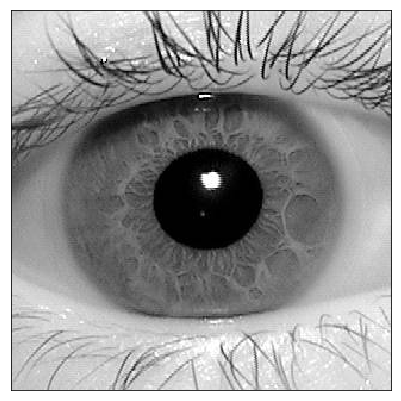

In [4]:
imshow(img)

In [5]:
s = np.linspace(0, 2*np.pi, 400)
# ¿Qué sucede si cambiamos estos números para que se detecte el iris?
x = 150 + 150*np.cos(s)
y = 150 + 150*np.sin(s)
init = np.array([x, y]).T

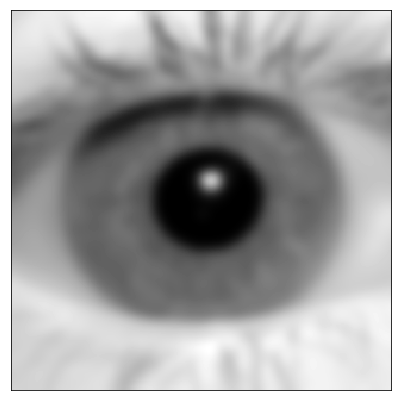

In [6]:
# En primer lugar, eliminamos detalles mediante el uso de un filtro gaussiano.
# Este filtro puede variarse
imshow(gaussian(img, 5))

In [7]:
snake = active_contour(gaussian(img, 5), # 5 para iris
                       init, 
                       alpha=0.015, beta=30, gamma=0.0001)

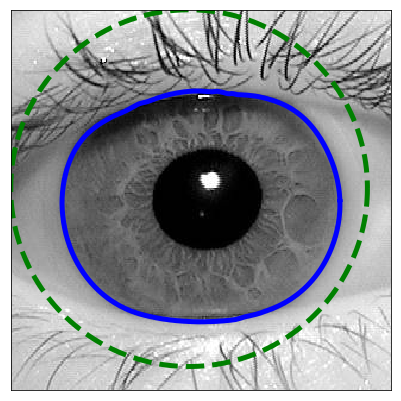

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--g', lw=5)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=5)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

## Detección de señales de tráfico

In [11]:
signals = data.imread('señales.jpeg')
signals = rgb2gray(signals)

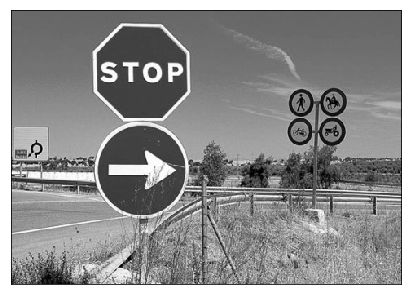

In [12]:
imshow(signals)

In [13]:
s = np.linspace(0, 2*np.pi, 400)
# ¿Qué sucede si cambiamos estos números para que se detecte el iris?
x = 150 + 150*np.cos(s)
y = 150 + 150*np.sin(s)
init = np.array([x, y]).T

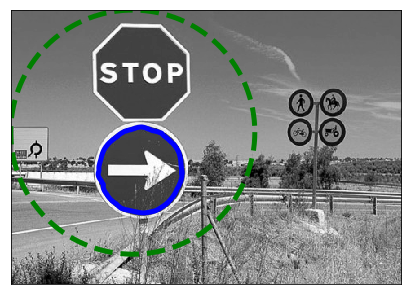

In [14]:
snake_signals = active_contour(gaussian(signals, 5), # 5 para iris, 2 para pupila.
                       init, alpha=0.15, beta=30, gamma=0.0001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(signals, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--g', lw=5)
ax.plot(snake_signals[:, 0], snake_signals[:, 1], '-b', lw=5)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, signals.shape[1], signals.shape[0], 0])

plt.show()

Variando el parámetro alpha, se puede conseguir que una señal o varias queden detectadas.

In [15]:
s = np.linspace(0, 2*np.pi, 400)
x = 400 + 80*np.cos(s)
y = 150 + 80*np.sin(s)
init_signals_2 = np.array([x, y]).T

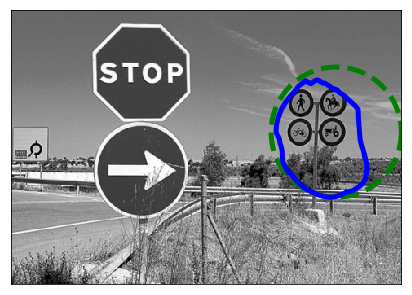

In [16]:
snake_signals = active_contour(gaussian(signals, 2), # 5 para iris, 2 para pupila.
                       init_signals_2, 
                        alpha=0.035, beta=30, gamma=0.0001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(signals, cmap=plt.cm.gray)
ax.plot(init_signals_2[:, 0], init_signals_2[:, 1], '--g', lw=5)
ax.plot(snake_signals[:, 0], snake_signals[:, 1], '-b', lw=5)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, signals.shape[1], signals.shape[0], 0])

plt.show()